# Fisher Discriminant Analysis

Dim reduction for viz.  

Finds lin comb. of features that separates two+ classes.  

Useful in Face Recognition, retrospective analysis for biomedical applications. 

**Requires standardization of data**. This means mean 0 and sdev = 1. 

# Imports

In [ ]:
# Change working directory to something useful for the notebok.
%cd ..

In [8]:
import Library.data as data
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Get Data

In [ ]:
rename_columns = {
    "sp": "species", "FL": "Frontal Lobe", "RW": "Rear Width", "CL": "Carapace Midline", "CW": "Maximum Width", "BD": "Body Depth"
}

remap = {
    "species": {"B": "Blue", "O": "Orange"},
    "sex": {"M": "Male", "F": "Female"},
}

combinator = {"class": ["species", "sex"]}

df = data.get_data(
    "Datasets/crabs.csv", 
    rename_columns=rename_columns,
    remap=remap,
    combinator=combinator
)

df


,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale
...,...,...,...,...,...,...,...,...,...
195,Orange,Female,46,21.4,18.0,41.2,46.2,18.7,OrangeFemale
196,Orange,Female,47,21.7,17.1,41.7,47.2,19.6,OrangeFemale
197,Orange,Female,48,21.9,17.2,42.6,47.4,19.5,OrangeFemale
198,Orange,Female,49,22.5,17.2,43.0,48.7,19.8,OrangeFemale


# Fisher Discriminant Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler

df_std = df.copy(deep=True)

data_columns = ["Frontal Lobe", "Rear Width", "Carapace Midline", "Maximum Width", "Body Depth"]
std_scalar = StandardScaler()
df_std[data_columns] = std_scalar.fit_transform(df[data_columns])
df_std.describe().T


,count,mean,std,min,25%,50%,75%,max
index,200.0,2.550000e+01,14.467083,1.000000,13.000000,25.500000,38.000000,50.000000
Frontal Lobe,200.0,-7.105427e-17,1.002509,-2.404365,-0.769523,-0.009465,0.707571,2.155984
Rear Width,200.0,6.039613e-16,1.002509,-2.430365,-0.677276,0.023959,0.608322,2.906815
Carapace Midline,200.0,1.065814e-16,1.002509,-2.451077,-0.680241,-0.000775,0.720938,2.181966
Maximum Width,200.0,-4.973799e-16,1.002509,-2.459741,-0.625872,0.049094,0.711325,2.315960
Body Depth,200.0,0.000000e+00,1.002509,-2.321439,-0.770008,-0.038200,0.752152,2.215766


# Apply to 2 Dims

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

fisher = LinearDiscriminantAnalysis(n_components=2)
df_std[["FISH1", "FISH2"]] = fisher.fit_transform(df_std[data_columns].values, y=df_std["class"].values)

df_std.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,FISH1,FISH2
0,Blue,Male,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989,BlueMale,1.538869,-0.808137
1,Blue,Male,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899,BlueMale,1.637047,-0.370588
2,Blue,Male,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083,BlueMale,2.802492,-0.249383
3,Blue,Male,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721,BlueMale,2.295358,-1.029487
4,Blue,Male,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721,BlueMale,1.732949,-1.119930


## Plot 2D


<Axes: xlabel='FISH1', ylabel='FISH2'>

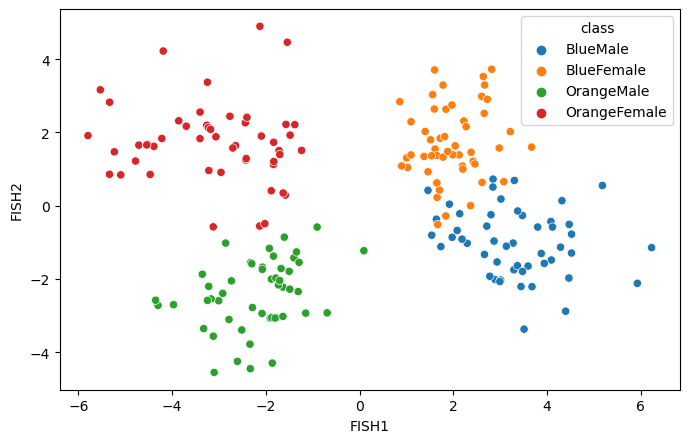

In [22]:
figure = plt.figure(figsize=(8, 8/1.618))

sns.scatterplot(x="FISH1", y="FISH2", hue="class", data=df_std)

You can see how the Blue female and blue male classes are grouped together, while the orange female and orange male classes are grouped together.  

Consider comparing Orange females with lower FISH1 value versus Blue males with high FISH 1 values (below commented).  

You can see how different these two results are for the relevant data_columns.


In [ ]:
# df_std[df_std["FISH1"] < -4.5]
# # 189	Orange	Female	40	1.295540	1.738090	1.083555	0.978764	1.337597	OrangeFemale	-5.795241	1.912642
# # 191	Orange	Female	42	1.410266	1.854962	1.111719	1.157057	1.513231	OrangeFemale	-5.333118	2.825221
# # 192	Orange	Female	43	1.438948	1.854962	1.322952	1.246203	1.513231	OrangeFemale	-4.708947	1.652114

# df_std[df_std["FISH1"] > 4.5]
# # __    Blue	Male	35	0.291690	0.296662	0.844157	0.889618	0.254523	BlueMale	6.228261	-1.148272
# # 39	Blue	Male	40	0.463779	0.296662	0.773746	0.953294	0.605790	BlueMale	4.521120	-0.780087
# # 40	Blue	Male	41	0.607186	0.335619	0.928651	1.029705	0.576518	BlueMale	4.520059	-1.295832

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,FISH1,FISH2
34,Blue,Male,35,0.291690,0.296662,0.844157,0.889618,0.254523,BlueMale,6.228261,-1.148272
39,Blue,Male,40,0.463779,0.296662,0.773746,0.953294,0.605790,BlueMale,4.521120,-0.780087
40,Blue,Male,41,0.607186,0.335619,0.928651,1.029705,0.576518,BlueMale,4.520059,-1.295832
43,Blue,Male,44,0.922682,1.192684,1.407445,1.602789,1.103419,BlueMale,5.179226,0.549691
49,Blue,Male,50,1.639718,1.153727,2.111555,2.315960,1.747410,BlueMale,5.924335,-2.123251


# Apply to 3 Dims

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# data standardization
df = data.get_data("Datasets/crabs.csv", rename_columns=rename_columns, remap=remap, combinator=combinator)
df_std = df.copy(deep=True)
df_std[data_columns] = StandardScaler().fit_transform(df[data_columns])

# fitting fisher
fisher = LinearDiscriminantAnalysis(n_components=3)
df_std[["FISH1", "FISH2", "FISH3"]] = fisher.fit_transform(df_std[data_columns].values, y=df_std["class"].values)
df_std

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,FISH1,FISH2,FISH3
0,Blue,Male,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989,BlueMale,1.538869,-0.808137,1.186420
1,Blue,Male,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899,BlueMale,1.637047,-0.370588,1.172750
2,Blue,Male,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083,BlueMale,2.802492,-0.249383,0.502351
3,Blue,Male,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721,BlueMale,2.295358,-1.029487,0.814667
4,Blue,Male,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721,BlueMale,1.732949,-1.119930,0.728544
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Orange,Female,46,1.668399,2.049750,1.280706,1.246203,1.366870,OrangeFemale,-5.530956,3.164291,-1.508874
196,Orange,Female,47,1.754443,1.699132,1.351117,1.373555,1.630320,OrangeFemale,-5.232736,1.469334,-1.576284
197,Orange,Female,48,1.811806,1.738090,1.477856,1.399026,1.601048,OrangeFemale,-5.336236,0.856704,-1.510929
198,Orange,Female,49,1.983895,1.738090,1.534185,1.564583,1.688865,OrangeFemale,-4.780087,1.217638,-2.704188


## Plotting 3D

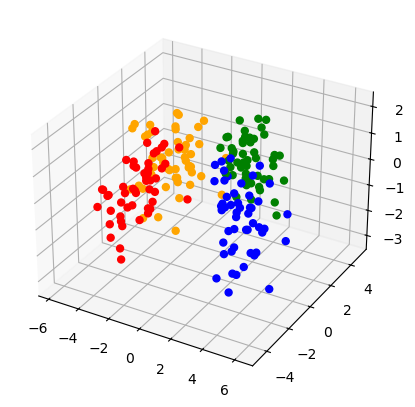

In [67]:
figure = plt.figure(figsize=(8, 8 / 1.618))
ax = plt.subplot(111, projection="3d")

color_map = {"BlueMale": "blue", "BlueFemale": "green", "OrangeMale": "red", "OrangeFemale": "orange"}

plt.scatter(
    df_std["FISH1"], df_std["FISH2"], zs=df_std["FISH3"], 
    s=25, depthshade=False, c=df["class"].map(lambda x: color_map[x]),
)

In [73]:
import plotly.express as px

px.scatter_3d(df_std, x="FISH1", y="FISH2", z="FISH3", color="class")

You can see a similar separation effect using the 3D decomposition with Linear Discriminant Analysis / Fisher Discriminant Analysis. Most of the separation is attributed to sex.